# Push Down Automata Validation and Visualization

## Language
The language is defined as follows and it is accepted by the empty stack:

$L = \{(ab)^n(aa)^n \mid n \geq 0\}$

## Declarations of PDA
The PDA is defined as follows:

$M = (Q, \Sigma, \Gamma, \delta, q_0, Z_0, F)$

where:
- Q = {q0, q1, q2} - the set of states
- Σ = {a, b} - the input alphabet
- Γ = {A, B, Z0} - the stack alphabet
- δ - the transition function, defined as follows:
    - δ(q0, a, Z0) = {(q0, AZ0)}
    - δ(q0, a, A) = {(q0, AA)}
    - δ(q0, b, A) = {(q1, ε)}
    - δ(q1, a, A) = {(q1, ε)}
    - δ(q1, a, Z0) = {(q2, AZ0)}
    - δ(q2, a, A) = {(q2, AA)}
    - δ(q2, ε, Z0) = {(q2, Z0)}
- q0 - the start state
- Z0 - the start stack symbol
- F = {q2} - the set of accept states

This PDA accepts the language by empty stack. It pushes 'A' onto the stack for each 'a' it reads in the first part of the string, then pops for each 'b' and 'a' it reads in the second part of the string. If the stack is empty at the end of the input, the string is accepted.

### Defining Non-deterministic Pushdown Automata

In [1]:

from automata.pda.npda import NPDA
from automata.base.exceptions import RejectionException
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

npda = NPDA(
    states={'q0', 'q1', 'qf'},
    input_symbols={'a', 'b'},
    stack_symbols={'Z', 'A', 'B'},
    transitions={
        'q0': {
            '': {
                'Z': {('qf', '')}, 
                'B': {('q1', ('B'))},
            },
            'a': {
                'Z': {('q0', ('A', 'Z'))},
                'B': {('q0', ('A', 'B'))},                
            },
            'b': {
                'A': {('q0', ('B', 'A')),}                
            },
        },
        'q1': {
            '': {'Z': {('qf', '')}},
            'a': {
                'A': {('q1', '')},
                'B': {('q1', '')},
            },  
        },
    },
    initial_state='q0',
    initial_stack_symbol='Z',
    final_states={'qf'},
    acceptance_mode='empty_stack'
    # acceptance_mode='final_state'
)

### Checking validity of the automata

In [2]:

if npda.validate():
    Exception("Invalid automata, check Non-deterministic Pushdown Automata definition")

### Non-deterministic Pushdown Automata diagram

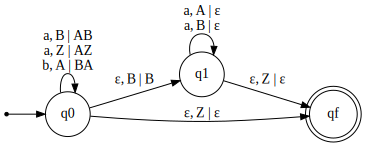

In [3]:
npda.show_diagram()

### Definieing test input sequences

In [4]:
test_inputs = ["ababaaaa","abababaaaaaa","abababababaaaaaaaaaa","ababababababaaaaaaaaaaaa","abababababababaaaaaaaaaaaaaa", "aaaaa", "babaaaaa", "abbaabbaaaaaaa", "abaaaaaaa", "bbbbaaaa"]

### Testing proposed solution

Input: ababaaaa is accepted!


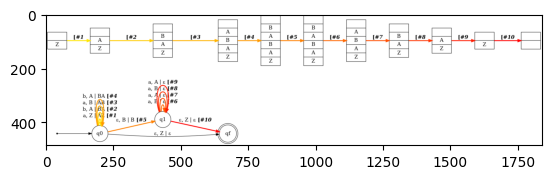

Input: abababaaaaaa is accepted!


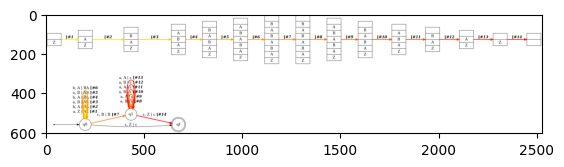

Input: abababababaaaaaaaaaa is accepted!


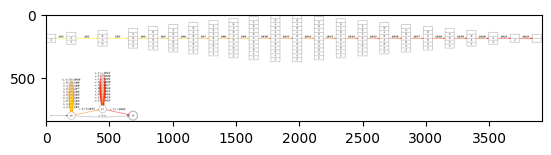

Input: ababababababaaaaaaaaaaaa is accepted!


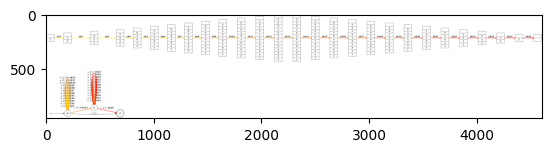

Input: abababababababaaaaaaaaaaaaaa is accepted!


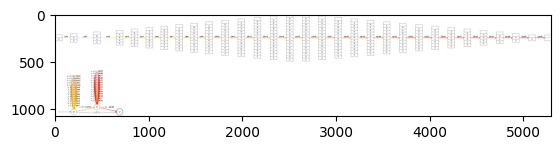

Input: aaaaa is not accepted.
Input: babaaaaa is not accepted.
Input: abbaabbaaaaaaa is not accepted.
Input: abaaaaaaa is not accepted.
Input: bbbbaaaa is not accepted.


In [5]:
for test_case in test_inputs:
    is_accepted = npda.accepts_input(input_str=test_case)
    
    if is_accepted:
        plot_path = f"./plots/{test_case}.png"
        npda.show_diagram(input_str=test_case, path=plot_path, with_stack=True, fig_size=(1000,10000))
        print(f"Input: {test_case} is accepted!")        
        current_img = mpimg.imread(plot_path)
        plt.imshow(current_img)
        plt.show()
    else:
        print(f"Input: {test_case} is not accepted.")